# Анализ рынка заведений общественного питания Москвы

## Описание проекта
Инвесторы из фонда «Shut Up and Take My Money» решили открыть заведение общественного питания в Москве.

Заказчики не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

**Задача** — подготовить исследование рынка Москвы, найти интересные особенности, которые в будущем помогут в выборе подходящего инвесторам места.

**Описание данных**

Файл `moscow_places.csv` — содержит информацию о заведениях общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года:
* name — название заведения;
* address — адрес заведения;
* category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* hours — информация о днях и часах работы;
* lat — широта географической точки, в которой находится заведение;
* lng — долгота географической точки, в которой находится заведение;
* rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
* price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона;
* middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»;
* middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»;
* chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым;
* district — административный район, в котором находится заведение, например Центральный административный округ;
* seats — количество посадочных мест.

**План проекта:**
1. Загрузка данных и изучение общей информации
2. Предобработка данных
3. Анализ данных
4. Детализация исследования: заказчик хочет открыть кофейню

## Общая информация о датасете

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import json
import folium
from folium import Map, Marker
from folium import Map, Choropleth
from folium.plugins import MarkerCluster

Прочитаем данные из csv-файла и сохраним их в соответствующую переменную:

In [2]:
places = pd.read_csv('moscow_places.csv')

Выведем первые 5 строчек датафрейма датафрейма `places` на экран:

In [3]:
display(places.head())

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


На первый взгляд проблем с датафреймом не наблюдается.

Выведем основную информацию о датафрейме с помощью метода `info()`:

In [4]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Выведем количество пропущенных значений в каждом столбце:

In [5]:
places.isna().sum()

,0
name,0
category,0
address,0
district,0
hours,536
lat,0
lng,0
rating,0
price,5091
avg_bill,4590


**Вывод:** была выведена информацию по датафрейму - типы данных не требуют исправлений, а вот столбцы нужно проверить на наличие дубликатов - возможно, доля пропущенных значений уменьшится. Выполним это на следующем этапе предобработки данных.

## Предобработка данных

### Поиск явных и неявных дубликатов

Проверим наличие явных дубликатов:

In [6]:
places.duplicated().sum()

0

Приведем названия заведений и адрес заведений в столбцах `name` и `address` соответственно к нижнему регистру для поиска неявных дубликатов:

In [7]:
places['name'] = places['name'].str.lower()
places['address'] = places['address'].str.lower()

Найдем неявные дубликаты в названиях заведения, находящихся по одному адресу:

In [8]:
duplicated_rows = places[places.duplicated(['name', 'address'])]
display(duplicated_rows)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
215,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",55.881438,37.531848,3.2,NaN,NaN,NaN,NaN,0,NaN
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0
2420,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0
3109,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0


Удалим эти дубликаты:

In [9]:
places.drop(duplicated_rows.index, inplace=True)
display(places.head())

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


Убедимся в корректности удаления:

In [10]:
duplicated_rows = places[places.duplicated(['name', 'address'])]
duplicated_rows

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats


Найдем неявные дубликаты в названии категорий заведения:

In [11]:
places['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Дубликаты в названиях категорий отсутствуют.

Найдем неявные дубликаты в названии районов:

In [12]:
places['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

В этом столбце также отсутствуют дубликаты.

### Создадим новые столбцы

Добавим новый столбец, содержашщий только название улицы:

In [13]:
places['street'] = places['address'].str.split(', ').str[1]
display(places.head())

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица


Создадим функцию, проверяющую, работает ли заведение 24/7:

In [14]:
def categorize_fulltime(hours):
    if hours == 'ежедневно, круглосуточно':
        return True
    else:
        return False

Создадим новый столбец, применив функцию:

In [15]:
places['is_24_7'] = places['hours'].apply(categorize_fulltime)
display(places)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,суши мания,кафе,"москва, профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",55.670021,37.552480,4.4,NaN,NaN,NaN,NaN,0,86.0,профсоюзная улица,False
8402,миславнес,кафе,"москва, пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",55.640875,37.656553,4.8,NaN,NaN,NaN,NaN,0,150.0,пролетарский проспект,False
8403,самовар,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648859,37.743219,3.9,NaN,Средний счёт:от 150 ₽,150.0,NaN,0,150.0,люблинская улица,True
8404,чайхана sabr,кафе,"москва, люблинская улица, 112а, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.648849,37.743222,4.2,NaN,NaN,NaN,NaN,1,150.0,люблинская улица,True


**Вывод:** в результате предобработки данных датафрейм был проверен на дубликаты и пропуски:
* были найдены и удалены дубликаты;
* пропуски было решено оставить, так как их количество превышает 5%, соответственно, их удаление исказит последующий анализ, а заменить их не представляется возможным.

Также были созданы столбец с названием улицы и столбец, категоризирующий заведения, работающие 24/7.

## Анализ данных

In [16]:
plt.style.use('seaborn-v0_8-pastel')

### Исследуем количество объектов общественного питания по категориям

Найдем количество и доли категории заведений:

In [17]:
places_category = (
    places
    .groupby('category')
    .agg(count=('category', 'count'))
    .reset_index()
    .sort_values('count', ascending=False)
)
places_category

,category,count
3,кафе,2376
6,ресторан,2042
4,кофейня,1413
0,"бар,паб",764
5,пиццерия,633
2,быстрое питание,603
7,столовая,315
1,булочная,256


Построим график распределения заведений по категориям:

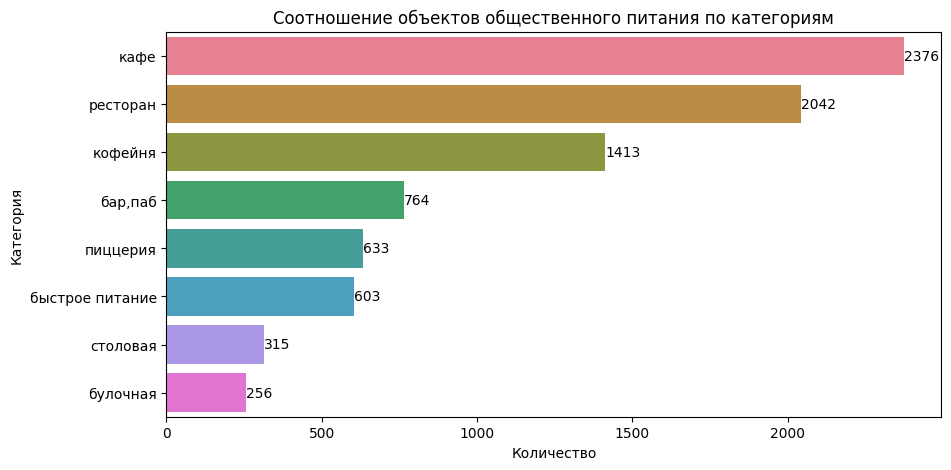

In [18]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='count',
    y='category',
    data=places_category,
    orient='h',
    hue='category'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.0f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Соотношение объектов общественного питания по категориям')
ax.set_xlabel('Количество')
ax.set_ylabel('Категория')
plt.show()

**Вывод:** отчетливо выделяются 3 категории: кафе, рестораны и кофейни, а меньше всего столовых и булочных.

### Исследуем количество посадочных мест в местах по категориям

Найдем количество посадочных мест по категориям:

In [19]:
places_seats = (
    places
    .groupby('category')
    .agg({'seats': 'median'})
    .sort_values(by='seats', ascending=False)
    .reset_index()
)
places_seats

,category,seats
0,ресторан,86.0
1,"бар,паб",82.0
2,кофейня,80.0
3,столовая,75.5
4,быстрое питание,65.0
5,кафе,60.0
6,пиццерия,55.0
7,булочная,50.0


Построим график распределения посадочных мест по категориям:

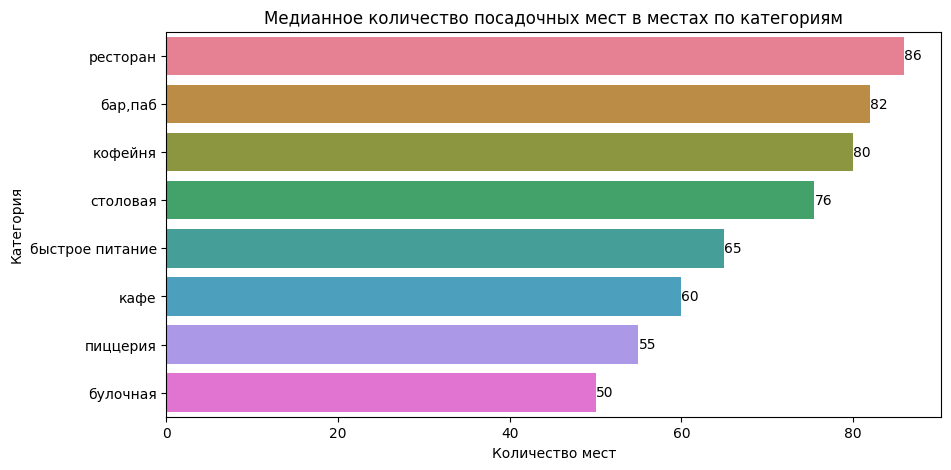

In [20]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='seats',
    y='category',
    data=places_seats,
    orient='h',
    hue='category'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.0f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Медианное количество посадочных мест в местах по категориям')
ax.set_xlabel('Количество мест')
ax.set_ylabel('Категория')
plt.show()

**Вывод:** больше всего мест в ресторанах, а меньше всего в булочных, что соответствует действительности.

### Рассмотрим соотношение сетевых и несетевых заведений в датасете

Найдем соотношение сетевых и несетевых заведений:

In [21]:
places_is_chain = (
    places
    .groupby('chain')
    .agg(count=('category','count'))
    .reset_index()
)
places_is_chain

,chain,count
0,0,5199
1,1,3203


Построим круговую диаграмму сетевых и несетевых заведений:

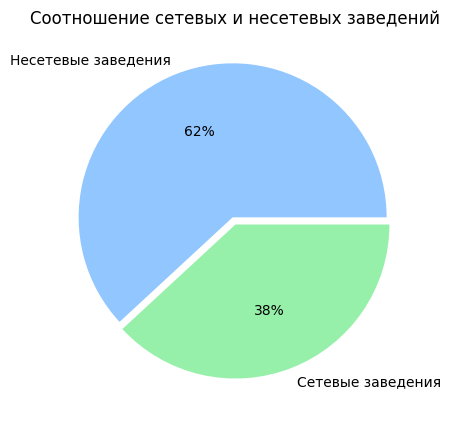

In [22]:
explode = (0.05, 0)
plt.figure(figsize=(10, 5))
plt.pie(
    places_is_chain['count'],
    labels=places_is_chain['chain'].map({1: 'Сетевые заведения', 0: 'Несетевые заведения'}),
    explode=explode,
    autopct='%1.0f%%'
)
plt.title('Соотношение сетевых и несетевых заведений')
plt.show()

### Исследуем какие категории заведений чаще являются сетевыми

In [23]:
# найдем самых популярные сетевые заведения
places_chain = (
    places
    .groupby('category')
    .agg(count=('chain', 'sum'))
    .reset_index()
    .sort_values('count', ascending=False)
)
places_chain

,category,count
3,кафе,779
6,ресторан,729
4,кофейня,720
5,пиццерия,330
2,быстрое питание,232
0,"бар,паб",168
1,булочная,157
7,столовая,88


Найдем доли сетевых заведений:

In [24]:
# объединим датафреймы, рассчитывающие количество заведений и количество сетевых заведений
places_chain_merged = (
    places_chain
    .merge(places_category, on='category', how='left', suffixes=('_chain', '_not_chain'))
)

# посчитаем долю сетевых заведений
places_chain_merged['ratio'] = (
    places_chain_merged['count_chain'] / places_chain_merged['count_not_chain'] * 100
).round(2)

#отсортируем по убыванию
places_chain_merged = (
    places_chain_merged
    .sort_values(by='ratio', ascending=False)
)
places_chain_merged

,category,count_chain,count_not_chain,ratio
6,булочная,157,256,61.33
3,пиццерия,330,633,52.13
2,кофейня,720,1413,50.96
4,быстрое питание,232,603,38.47
1,ресторан,729,2042,35.70
0,кафе,779,2376,32.79
7,столовая,88,315,27.94
5,"бар,паб",168,764,21.99


Построим график распределения сетевых заведений по категориям:

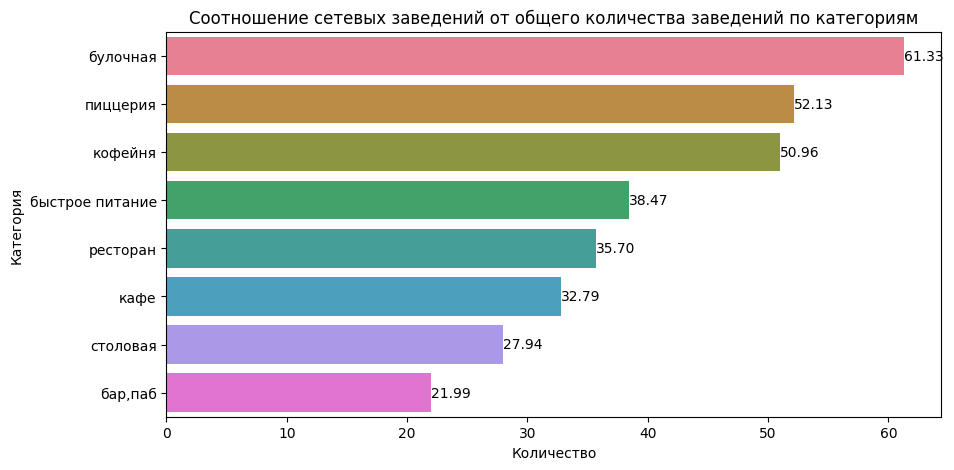

In [25]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='ratio',
    y='category',
    data=places_chain_merged,
    orient='h',
    hue='category'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.2f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Соотношение сетевых заведений от общего количества заведений по категориям')
ax.set_xlabel('Количество')
ax.set_ylabel('Категория')
plt.show()

**Вывод:** наиболее популярные категории сетевых заведений - кафе, рестораны и кофейни. К удивлению, их сильно больше, чем пиццерий, быстрого питания и булочных. Сетевых столовых меньше всего, похоже на правду.

### Исследуем топ-15 популярных сетей в Москве

Найдем топ-15 самых популярных сетей в Москве:

In [26]:
# выделим только сетевые заведения
is_chain = places[places['chain'] == 1]

# найдем количество топ-15 заведений по названию заведения
places_name = (
    is_chain
    .groupby('name')
    .agg(count=('chain', 'count'))
    .reset_index()
    .sort_values('count', ascending=False)
)

top_places_name = places_name.head(15)
top_places_name

,name,count
729,шоколадница,120
335,домино'с пицца,76
331,додо пицца,74
146,one price coffee,71
742,яндекс лавка,69
58,cofix,65
168,prime,50
664,хинкальная,44
409,кофепорт,42
418,кулинарная лавка братьев караваевых,39


Построим график распределения топ-15 сетевых заведений:

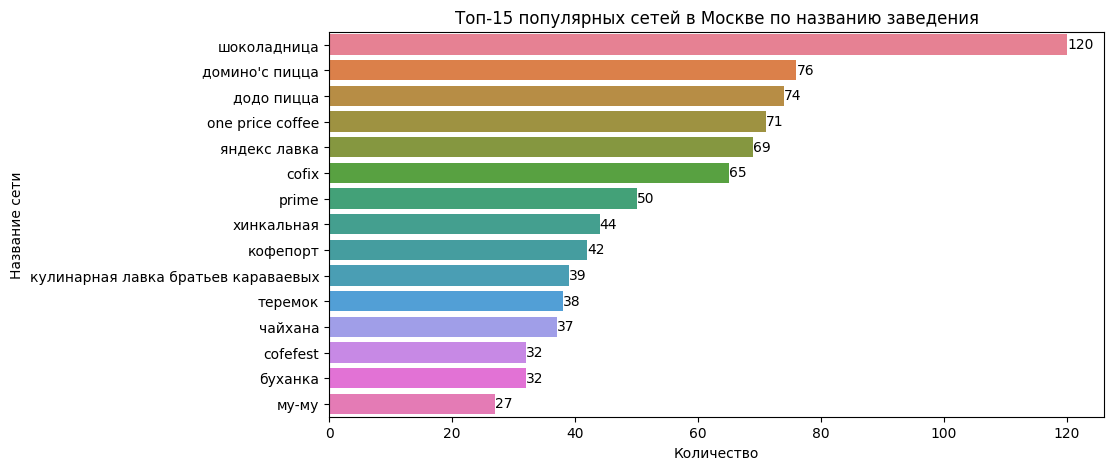

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='count',
    y='name',
    data=top_places_name,
    orient='h',
    hue='name'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.0f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Топ-15 популярных сетей в Москве по названию заведения')
ax.set_xlabel('Количество')
ax.set_ylabel('Название сети')
plt.show()

Создадим датафрейм с топ-15 сетевых заведений:

In [28]:
# создадим список топ-15 сетевых заведений
top_places_name_list = list(top_places_name['name'])

# создадим датафрейм, содержащий только топ-15 сетевых заведений
top_places =  places[places['name'].isin(top_places_name_list)]

display(top_places.head())

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
13,буханка,булочная,"москва, базовская улица, 15, корп. 1",Северный административный округ,"ежедневно, 08:00–22:00",55.877007,37.504980,4.8,NaN,NaN,NaN,NaN,1,180.0,базовская улица,False
23,буханка,булочная,"москва, лобненская улица, 13к2",Северный административный округ,"ежедневно, 08:00–22:00",55.888421,37.527106,4.7,NaN,NaN,NaN,NaN,1,NaN,лобненская улица,False
32,додо пицца,пиццерия,"москва, коровинское шоссе, 23, корп. 1",Северный административный округ,"ежедневно, 09:00–23:00",55.877388,37.523334,4.3,NaN,Средний счёт:328 ₽,328.0,NaN,1,46.0,коровинское шоссе,False
34,домино'с пицца,пиццерия,"москва, клязьминская улица, 11, корп. 4",Северный административный округ,"ежедневно, 10:00–23:00",55.886963,37.523518,4.2,NaN,Средний счёт:от 500 ₽,500.0,NaN,1,247.0,клязьминская улица,False
46,cofefest,кофейня,"москва, улица маршала федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,NaN,NaN,NaN,NaN,1,NaN,улица маршала федоренко,False


In [29]:
# найдем количество топ-15 заведений по категории заведения
top_places_category = (
    top_places
    .groupby('category')
    .agg(count=('name', 'count'))
    .reset_index()
    .sort_values('count', ascending=False)
)
# найдем долю от общего количества топ-15 заведений
total = len(top_places['name'])
top_places_category['ratio'] = (top_places_category['count'] / total * 100).round(2)

display(top_places_category)

,category,count,ratio
4,кофейня,337,41.20
6,ресторан,186,22.74
5,пиццерия,152,18.58
3,кафе,100,12.22
1,булочная,25,3.06
2,быстрое питание,12,1.47
0,"бар,паб",4,0.49
7,столовая,2,0.24


Построим график распределения топ-15 категорий сетевых заведений:

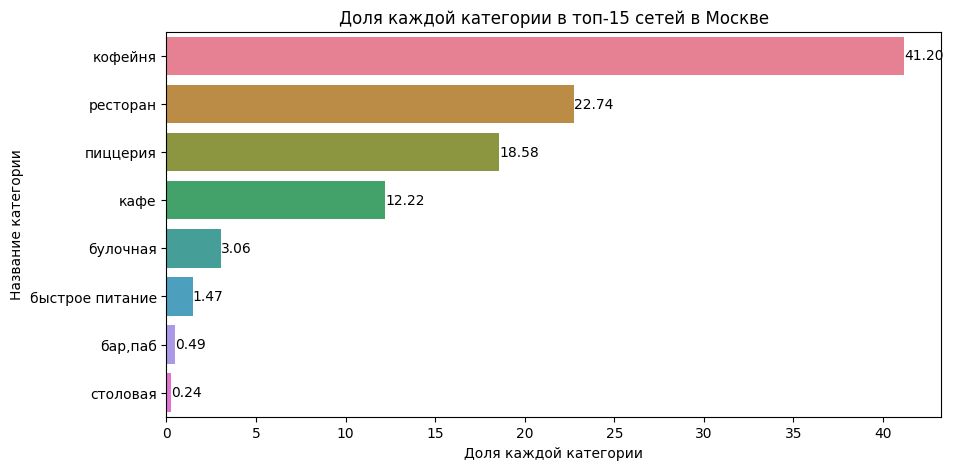

In [30]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='ratio',
    y='category',
    data=top_places_category,
    orient='h',
    hue='category'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.2f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Доля каждой категории в топ-15 сетей в Москве')
ax.set_xlabel('Доля каждой категории')
ax.set_ylabel('Название категории')
plt.show()

**Вывод:** самое популярное сетевое заведение - Шоколадница. Му-му же наоборот в конце списка топ-15.

Было проанизировано кол-во популярных сетевых заведений по категориям, было найдено, что в топе кофейни, затем идет приблизительно равна группа из рестаранов, пиццерий и кафе. Сетей столовых меньше всего.

### Исследуем административные районы Москвы в датасете

Найдем административные районы Москвы:

In [31]:
places_district = (
    places
    .groupby(['district', 'category'])
    .agg(count=('name', 'count'))
    .reset_index()
    .sort_values('count', ascending=False)
)

display(places_district.head(10))

,district,category,count
46,Центральный административный округ,ресторан,670
43,Центральный административный округ,кафе,464
44,Центральный административный округ,кофейня,428
40,Центральный административный округ,"бар,паб",364
51,Юго-Восточный административный округ,кафе,282
3,Восточный административный округ,кафе,272
27,Северо-Восточный административный округ,кафе,269
67,Южный административный округ,кафе,264
11,Западный административный округ,кафе,238
59,Юго-Западный административный округ,кафе,238


Построим график распределения по административному району:

In [32]:
# добавим столбец с долями количества заведений в каждом районе
places_district['ratio'] = places_district['count'] / places_district.groupby('district')['count'].transform('sum')

# построим график
fig = px.bar(
    places_district,
    x='ratio',
    y='district',
    color='category',
    text='count',
    title='Количество заведений в районах Москвы'
)

# добавим отображение значений
fig.update_layout(
    barmode='stack',
    xaxis=dict(title_text='Доля заведений в районе', tickformat=',.0%'),
    yaxis={'categoryorder':'total ascending', 'title_text': 'Название района'}
)

fig.update_traces(texttemplate='%{text}', textposition='inside')

fig.show()

**Вывод:** наиболее распространенный район - Центральный. Там больше всего ресторанов, что логично, так как ресторан является престижным заведением. В остальных районах по количеству заведений доминируют кафе. Во всех районах меньше всего булочных и столовых, как это и было выяснено раньше.

### Исследуем средние рейтинги по категориям заведений

Найдем средние рейтинги по категориям:

In [33]:
places_rating = (
    places
    .groupby('category')
    .agg(count=('rating', 'mean'))
    .round(2)
    .reset_index()
    .sort_values('count', ascending=False)
)
display(places_rating)

,category,count
0,"бар,паб",4.39
5,пиццерия,4.30
6,ресторан,4.29
4,кофейня,4.28
1,булочная,4.27
7,столовая,4.21
3,кафе,4.12
2,быстрое питание,4.05


Построим график:

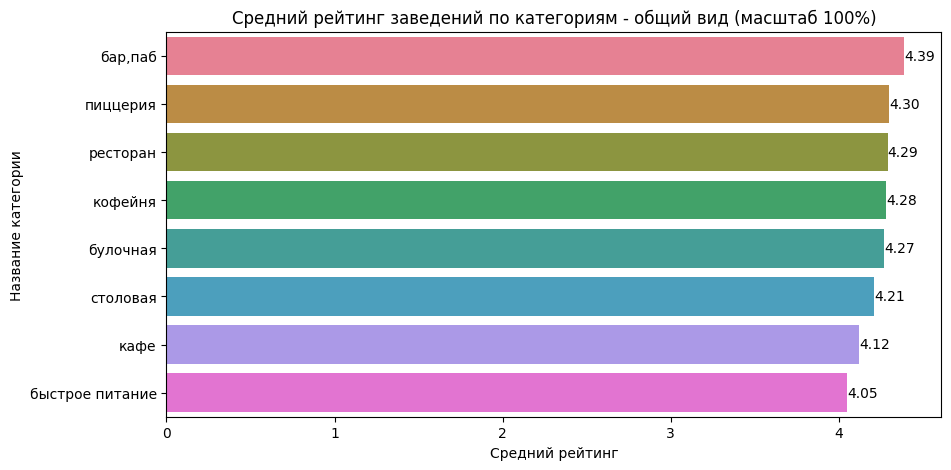

In [34]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='count',
    y='category',
    data=places_rating,
    orient='h',
    hue='category'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.2f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Средний рейтинг заведений по категориям - общий вид (масштаб 100%)')
ax.set_xlabel('Средний рейтинг')
ax.set_ylabel('Название категории')
plt.show()

Построим график, ограничив значения по оси Х:

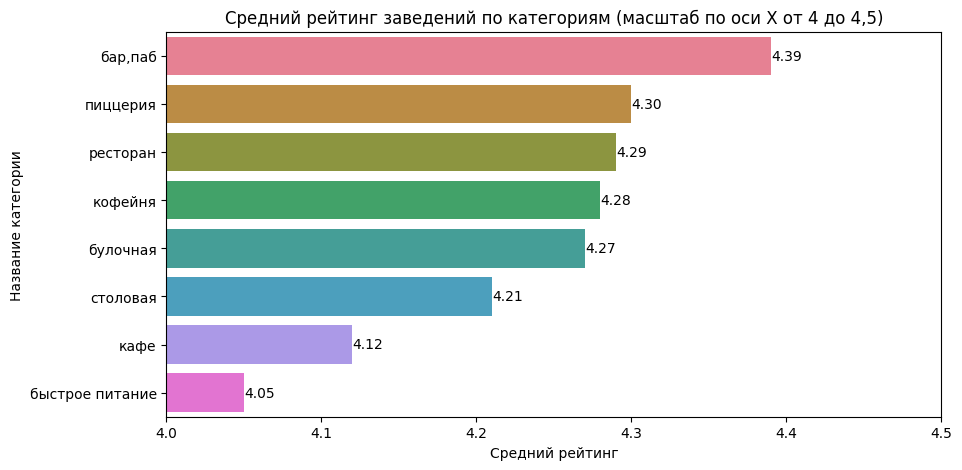

In [35]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='count',
    y='category',
    data=places_rating,
    orient='h',
    hue='category'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.2f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Средний рейтинг заведений по категориям (масштаб по оси X от 4 до 4,5)')
ax.set_xlabel('Средний рейтинг')
ax.set_ylabel('Название категории')
plt.xlim(4, 4.5)
plt.show()

**Вывод:** лучшие рейтинги у баров и пабов (4.39). Далее средний рейтинг примерно одинаковый во всех категориях (4.2-4.3), за исключением кафе и быстрого питания.

### Построим фоновую картограмму (хороплет) со средним рейтингом заведений каждого района

Создадим датафрейм со средними рейтингами по районам Москвы:

In [36]:
rating_district = (
    places
    .groupby('district', as_index=False)['rating']
    .agg('mean')
    .round(2)
)
display(rating_district.head())

,district,rating
0,Восточный административный округ,4.17
1,Западный административный округ,4.18
2,Северный административный округ,4.24
3,Северо-Восточный административный округ,4.15
4,Северо-Западный административный округ,4.21


Построим картограмму:

In [37]:
# загружаем JSON-файл с границами районов Москвы
district_geo = 'admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=district_geo,
    data=rating_district,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.5,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# применяем функцию create_clusters() к каждой строке датафрейма
places.apply(create_clusters, axis=1)

# выводим карту
m

Output hidden; open in https://colab.research.google.com to view.

### Найдем топ-15 улиц по количеству заведений

Найдем количество топ-15 улиц по количеству заведений:

In [38]:
places_street = (
    places
    .groupby('street')
    .agg(count=('name', 'count'))
    .reset_index()
    .sort_values('count', ascending=False)
)

top_places_street = places_street.head(15)
top_places_street

,street,count
837,проспект мира,183
841,профсоюзная улица,122
834,проспект вернадского,108
533,ленинский проспект,107
531,ленинградский проспект,95
379,дмитровское шоссе,88
461,каширское шоссе,77
304,варшавское шоссе,76
532,ленинградское шоссе,70
610,мкад,65


Построим график распределения топ-15 улиц по количеству заведений:

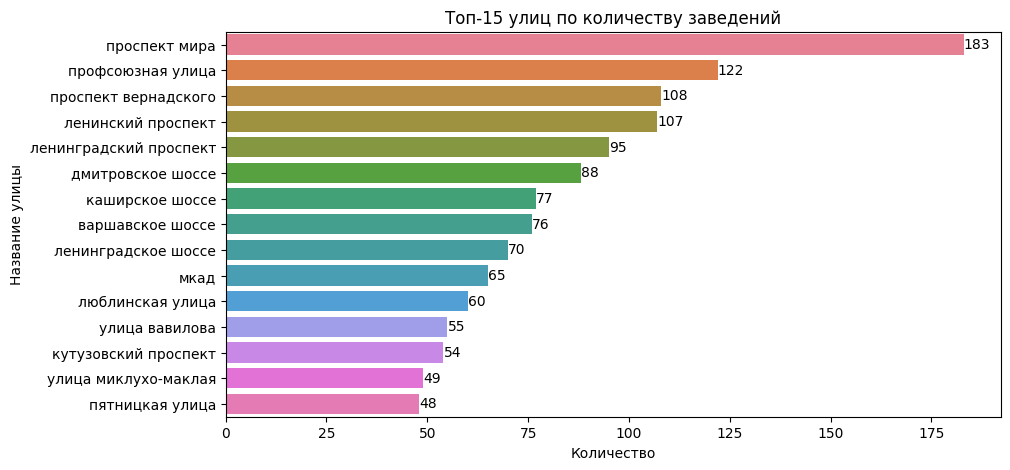

In [39]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='count',
    y='street',
    data=top_places_street,
    orient='h',
    hue='street'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.0f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Топ-15 улиц по количеству заведений')
ax.set_xlabel('Количество')
ax.set_ylabel('Название улицы')
plt.show()

### Найдем улицы, на которых находится только один объект общепита

In [40]:
# сделаем срез, выделив улицы с одним заведением
one_place_street = places_street.query('count == 1')
one_place_street

,street,count
1096,улица вучетича,1
1252,улица олеко дундича,1
1425,электрический переулок,1
1165,улица конёнкова,1
1193,улица лобачика,1
...,...,...
716,островная улица,1
719,отрадный проезд,1
720,павелецкая набережная,1
1,1-й балтийский переулок,1


In [41]:
# создадим список улиц с одним заведением
one_place_street_list = list(one_place_street['street'])

# создадим датафрейм, содержащий только улицы с одним заведением
one_place_data = places[places['street'].isin(one_place_street_list)]

display(one_place_data.head())

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
15,дом обеда,столовая,"москва, улица бусиновская горка, 2",Северный административный округ,пн-пт 08:30–18:30; сб 10:00–20:00,55.885890,37.493264,4.1,средние,Средний счёт:300–500 ₽,400.0,NaN,0,180.0,улица бусиновская горка,False
21,7/12,кафе,"москва, прибрежный проезд, 7",Северный административный округ,"ежедневно, 10:00–22:00",55.876805,37.464934,4.5,NaN,NaN,NaN,NaN,0,NaN,прибрежный проезд,False
25,в парке вкуснее,кофейня,"москва, парк левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,1,NaN,парк левобережный,False
58,coffeekaldi's,кофейня,"москва, угличская улица, 13, стр. 8",Северо-Восточный административный округ,"ежедневно, 09:00–22:00",55.900316,37.570558,4.1,средние,Средний счёт:500–800 ₽,650.0,NaN,1,NaN,угличская улица,False
60,чебуречная история,кофейня,"москва, ландшафтный заказник лианозовский",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.899845,37.570488,4.9,NaN,NaN,NaN,NaN,1,NaN,ландшафтный заказник лианозовский,False


In [42]:
# найдем количество улиц с одним заведением во всех районах
district_street = (
    one_place_data
    .groupby('district')
    .agg(count=('name', 'nunique'))
    .reset_index()
    .sort_values('count', ascending=False)
)
district_street

,district,count
5,Центральный административный округ,140
3,Северо-Восточный административный округ,54
0,Восточный административный округ,49
2,Северный административный округ,48
8,Южный административный округ,41
6,Юго-Восточный административный округ,35
1,Западный административный округ,34
4,Северо-Западный административный округ,19
7,Юго-Западный административный округ,18


In [43]:
# найдем средние рейтинги по району
one_place_rating = (
    one_place_data
    .groupby('district')
    .agg(count=('rating', 'mean'))
    .round(2)
    .reset_index()
    .sort_values('count', ascending=False)
)
display(one_place_rating)

,district,count
5,Центральный административный округ,4.42
4,Северо-Западный административный округ,4.28
2,Северный административный округ,4.26
3,Северо-Восточный административный округ,4.16
7,Юго-Западный административный округ,4.15
0,Восточный административный округ,4.14
6,Юго-Восточный административный округ,4.12
8,Южный административный округ,4.09
1,Западный административный округ,4.05


Построим картограмму:

In [44]:
# загружаем JSON-файл с границами районов Москвы
district_geo = 'admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=district_geo,
    data=one_place_rating,
    columns=['district', 'count'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.5,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

# применяем функцию create_clusters() к каждой строке датафрейма
one_place_data.apply(create_clusters, axis=1)

# выводим карту
m

**Вывод:** довольно много улиц, на которых находится только 1 заведение. Какую-либо зависимость не удалось проследить. Были рассмотрены количество заведений с одной улицей по районам и по среднему рейтингу. Такие улицы есть как в центре, так и на окраинах, а рейтинг варьируется от низкого до высокого.

### Исследуем значения средних чеков заведений

Найдем значение среднего чека по районам:

In [45]:
places_avg_bill = (
    places
    .groupby('district')
    .agg({'middle_avg_bill': 'median'})
    .reset_index()
    .sort_values('middle_avg_bill', ascending=False)
)
display(places_avg_bill)

,district,middle_avg_bill
1,Западный административный округ,1000.0
5,Центральный административный округ,1000.0
4,Северо-Западный административный округ,700.0
2,Северный административный округ,650.0
7,Юго-Западный административный округ,600.0
0,Восточный административный округ,575.0
3,Северо-Восточный административный округ,500.0
8,Южный административный округ,500.0
6,Юго-Восточный административный округ,450.0


Построим график:

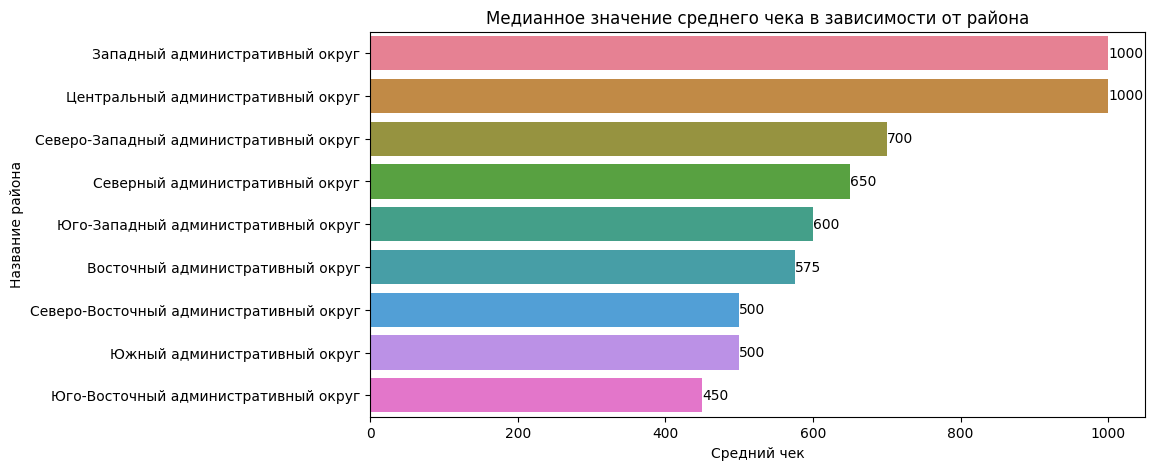

In [46]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='middle_avg_bill',
    y='district',
    data=places_avg_bill,
    orient='h',
    hue='district'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.0f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Медианное значение среднего чека в зависимости от района')
ax.set_xlabel('Средний чек')
ax.set_ylabel('Название района')
plt.show()

Построим картограмму:

In [47]:
# загружаем JSON-файл с границами районов Москвы
district_geo = 'admin_level_geomap.geojson'
# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# создаём карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# создаём пустой кластер, добавляем его на карту
marker_cluster = MarkerCluster().add_to(m)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['middle_avg_bill']}",
    ).add_to(marker_cluster)

# создаём хороплет с помощью конструктора Choropleth и добавляем его на карту
Choropleth(
    geo_data=district_geo,
    data=places_avg_bill,
    columns=['district', 'middle_avg_bill'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.5,
    legend_name='Медианный чек заведений по районам',
).add_to(m)

# применяем функцию create_clusters() к каждой строке датафрейма
places.apply(create_clusters, axis=1)

# выводим карту
m

Output hidden; open in https://colab.research.google.com to view.

**Вывод:** самый высокий средний чек в элитных районах Москвы - Центральном и Западном. Однако, стоит учитывать категории заведений в районах, так, например, в Центральном районе большую часть заведений составляют рестораны, в которых средний чек выше. Это оказывает большее влияние на величину среднего чека в районе.

## Детализация исследования: открытие кофейни

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно. Определим, реально ли это:

Создадим датафрейм, содержащий только кофейни:

In [48]:
cafe = places.query('category == "кофейня"')
display(cafe.head())

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко,False
25,в парке вкуснее,кофейня,"москва, парк левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,1,NaN,парк левобережный,False
45,9 bar coffee,кофейня,"москва, коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,NaN,NaN,NaN,NaN,1,46.0,коровинское шоссе,False
46,cofefest,кофейня,"москва, улица маршала федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,NaN,NaN,NaN,NaN,1,NaN,улица маршала федоренко,False
52,cofix,кофейня,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,NaN,NaN,NaN,NaN,1,NaN,улица дыбенко,False


Найдем количество кофеен в Москве:

In [49]:
len(cafe['category'])

1413

Выведем количество кофеен в разных районах:

In [50]:
cafe['district'].value_counts()

,count
district,
Центральный административный округ,428
Северный административный округ,193
Северо-Восточный административный округ,159
Западный административный округ,150
Южный административный округ,131
Восточный административный округ,105
Юго-Западный административный округ,96
Юго-Восточный административный округ,89
Северо-Западный административный округ,62


**Вывод:** всего в Москве 1413 кофеен, из них большая часть находится в центре или в непосредственной близости к центру.

Найдем количество кофейн, работающих круглосуточно:

In [51]:
cafe_allday = cafe.query('is_24_7 == True')
len(cafe_allday['is_24_7'])

59

**Вывод:** из 1413 кофеен в Москве 59 - кругосуточные.

Найдем средний рейтинг кофейн в каждом районе:

In [52]:
cafe_rating = (
    cafe
    .groupby('district')
    .agg({'rating': 'mean'})
    .sort_values(by='rating', ascending=False)
    .reset_index()
    .round(2)
)
display(cafe_rating)

,district,rating
0,Центральный административный округ,4.34
1,Северо-Западный административный округ,4.33
2,Северный административный округ,4.29
3,Юго-Западный административный округ,4.28
4,Восточный административный округ,4.28
5,Южный административный округ,4.23
6,Юго-Восточный административный округ,4.23
7,Северо-Восточный административный округ,4.22
8,Западный административный округ,4.20


Построим график:

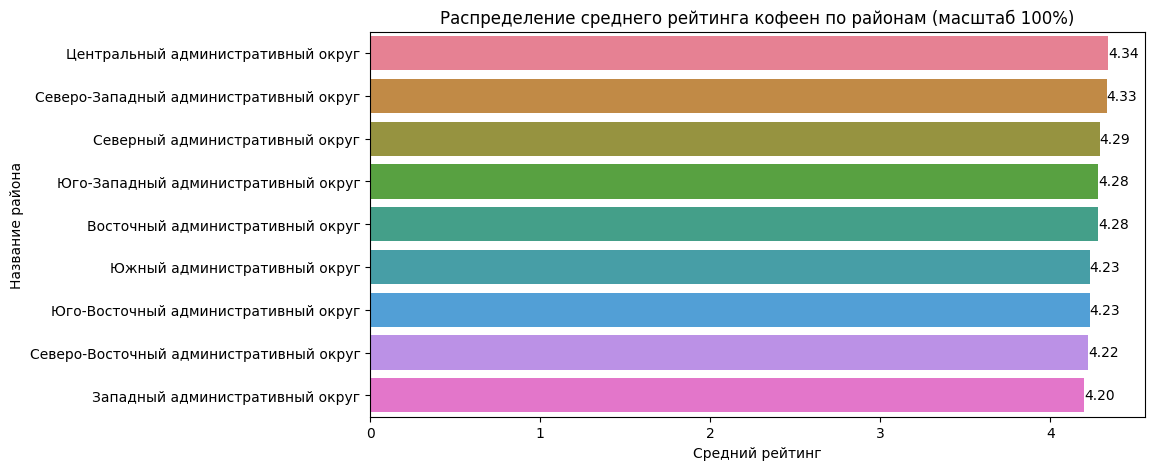

In [53]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='rating',
    y='district',
    data=cafe_rating,
    orient='h',
    hue='district'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.2f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Распределение среднего рейтинга кофеен по районам (масштаб 100%)')
ax.set_xlabel('Средний рейтинг')
ax.set_ylabel('Название района')
plt.show()

Построим график, ограничив значения по оси X:

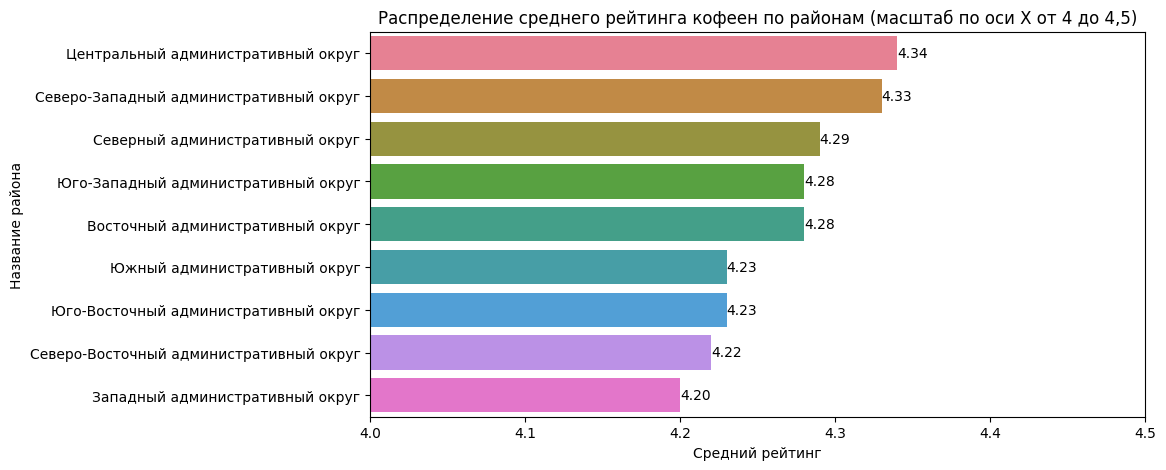

In [54]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='rating',
    y='district',
    data=cafe_rating,
    orient='h',
    hue='district'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.2f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Распределение среднего рейтинга кофеен по районам (масштаб по оси Х от 4 до 4,5)')
ax.set_xlabel('Средний рейтинг')
ax.set_ylabel('Название района')
plt.xlim(4, 4.5)
plt.show()

**Вывод:** рейтинг кофеен варьируется от 4.20 до 4.34, при этом наилучший рейтинг в Центральном районе, а наихудший - в Западном.

Выведем информацию по столбцу стоимости чашки:

In [55]:
cafe['middle_coffee_cup'].describe()

,middle_coffee_cup
count,521.000000
mean,175.055662
std,89.753009
min,60.000000
25%,124.000000
50%,170.000000
75%,225.000000
max,1568.000000


Построим гистограмму распределения стоимости чашки кофе:

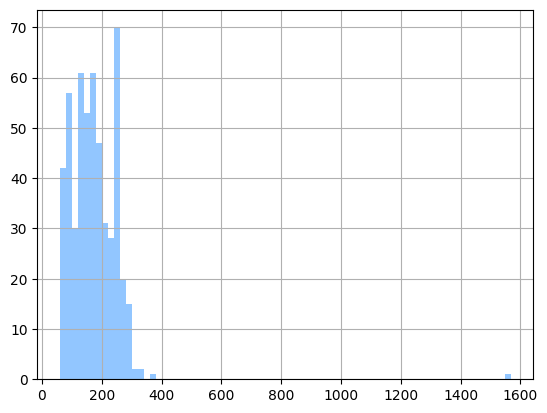

In [56]:
cafe['middle_coffee_cup'].hist(bins=75)
plt.show()

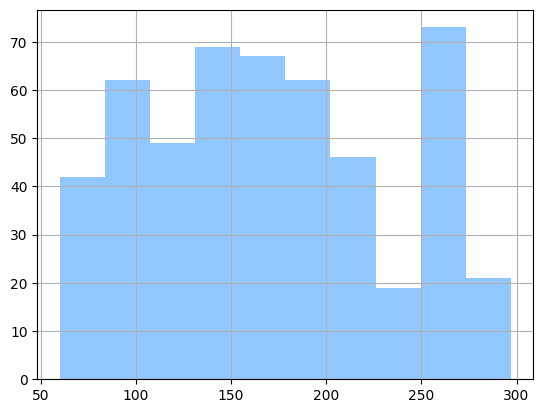

In [57]:
# сделаем срез стоимости чашки до 300 рублей
cafe_filtered = cafe.query('middle_coffee_cup < 300')

# построим гистограмму отфильнованных данных
cafe_filtered['middle_coffee_cup'].hist()
plt.show()

Найдем стоимость чашки кофе в кофейнях в зависимост о района:

In [58]:
cafe_cup = (
    cafe_filtered
    .groupby('district')
    .agg({'middle_coffee_cup': 'mean'})
    .sort_values(by='middle_coffee_cup', ascending=False)
    .reset_index()
)
cafe_cup

,district,middle_coffee_cup
0,Западный административный округ,185.255319
1,Юго-Западный административный округ,184.176471
2,Центральный административный округ,183.630573
3,Северо-Западный административный округ,165.523810
4,Северо-Восточный административный округ,165.333333
5,Северный административный округ,161.621622
6,Южный административный округ,158.488372
7,Юго-Восточный административный округ,144.303030
8,Восточный административный округ,140.024390


Построим график:

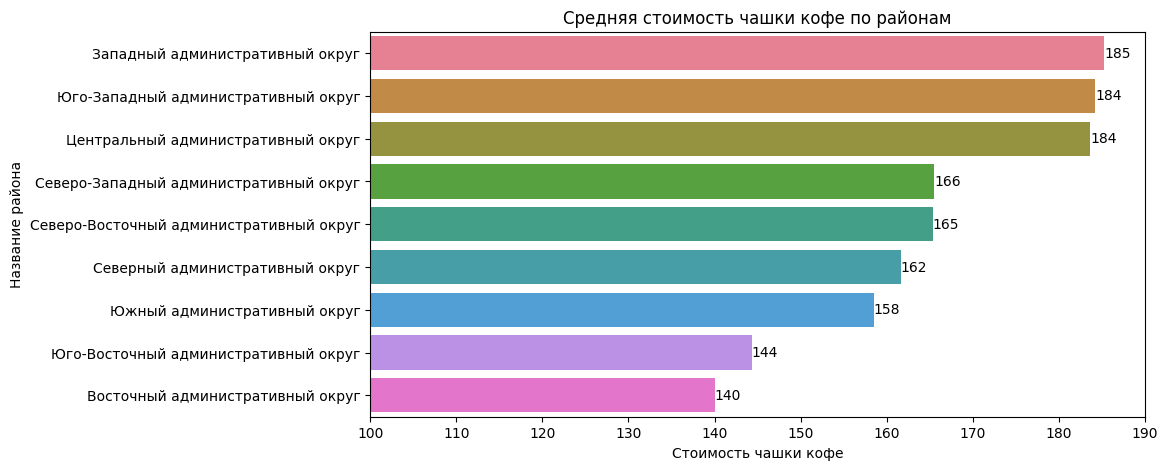

In [59]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(
    x='middle_coffee_cup',
    y='district',
    data=cafe_cup,
    orient='h',
    hue='district'
)

# добавим значение на каждый бар
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,
        p.get_y() + p.get_height() / 2,
        '{:1.0f}'.format(width),
        ha = 'left',
        va = 'center'
    )

ax.set_title('Средняя стоимость чашки кофе по районам')
ax.set_xlabel('Стоимость чашки кофе')
ax.set_ylabel('Название района')
plt.xlim(100, 190)
plt.show()

**Вывод:** в датафрейме содержались аномальные значения, например, максимальная стоимость чашки кофе составляла 1568 рублей. Ограничив стоимость 300 рублями и посчитав среднюю стоимость чашки кофе по районам, можно сделать вывод, что в завимости от района открытия кофейни цена должна находиться в диапазоне от 140 до 185 рублей.

## Общий вывод

В проектной работе было проведено исследование рынка общественного питания Москвы.

В начале работы была проведена предобработка данных - были удалены дубликаты, а пропуски было решено оставить из-за невозможности адекватно заменить их или вовсе удалить (количество пропусков превышает допустмые 5%). Также был создан столбец, категоризирующий заведения, работающие ежедневно и круглосуточно, для последующего анализа.

В ходе исследование были проанализированы следующие основные характеристики заведений:

* средний чек (показывает, на какие цены следует ориентироваться при открытии заведения);
* количество посадочных заведений (отображает площадь заведения);
* рейтинг заведений;
* в каких районах расположены заведения в зависимости от рейтинга.

В результате исследование можно сформировать следующую картину:

Топ-3 заведений:
1. кафе (28%);
2. рестораны (24%);
3. кофейни (17%)

Минимальное количество посадочных мест — 60, а максимальное — 86.

Сетевых заведений в Москве меньше (38%), при этом среди сетевых заведение с большим преимуществом больше всего кафе, ресторанов и кофеен.

Наивысший рейтинг у баров и пабов (4.4), у кофеен и ресторанов в районе 4.3.

Самая загруженная улица по количеству заведений — проспект Мира (183 заведения).

По районам наилучший рейтинг в Центральном районе, а также у заведений на севере города.

Медианная значение среднего чека составляет от 450 до 1000 рублей в зависимости от района. Стоит учитывать, что на эту стоимость также влияет тип заведения.

Рекомендации заказчикам по открытию кофейни:

Наилучшие районы для открытия кофейни:
1. Центральный (рейтинг 4.4);
2. Северо-Западный (рейтинг 4.3);
3. Северный (рейтинг 4.2).

Количество посадочных мест лучше сделать в районе 60-80.

Стоимость чашки кофе зависит от района открытия кофейни, однако рекомендуется установить цену в диапазоне от 140 до 185 рублей.